<a href="https://www.kaggle.com/code/ritikkoshta/analyzing-abalone-age?scriptVersionId=173124652" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


### <u> Objective </u>
* ### To predict the age of abalone from various physical measurements

### <u> Tasks </u>
* ### Validate all the assumptions
* ### Compute all the regression evaluation metrics
* ### Comment on the best evaluation metrics for this problem


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_18/2738433028.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [3]:
# Importing the dataset
train_data = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

### Merge datasets

In [4]:
df=pd.concat([train_data, test_data])

In [5]:
# first overview of the data 
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11.0
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11.0
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6.0
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10.0
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9.0


In [6]:
df.shape

(151026, 10)

In [7]:
# getting the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151026 entries, 0 to 60410
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              151026 non-null  int64  
 1   Sex             151026 non-null  object 
 2   Length          151026 non-null  float64
 3   Diameter        151026 non-null  float64
 4   Height          151026 non-null  float64
 5   Whole weight    151026 non-null  float64
 6   Whole weight.1  151026 non-null  float64
 7   Whole weight.2  151026 non-null  float64
 8   Shell weight    151026 non-null  float64
 9   Rings           90615 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 12.7+ MB


In [8]:
df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,90615.000000
mean,75512.500000,0.517230,0.401792,0.135579,0.789446,0.340958,0.169421,0.225989,9.696794
std,43597.595215,0.117974,0.097804,0.038075,0.457637,0.204345,0.100833,0.130052,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,37756.250000,0.445000,0.345000,0.110000,0.419500,0.177500,0.086500,0.120000,8.000000
50%,75512.500000,0.545000,0.425000,0.140000,0.799500,0.329500,0.166000,0.225000,9.000000
75%,113268.750000,0.600000,0.470000,0.160000,1.068000,0.463500,0.232500,0.305000,11.000000
max,151025.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


We can clearly see that average age of abalone is somewhat around 9 years and the maximum age is 29 year , it has also seen that some of the minimum heights are 0.

In [9]:
# Get all entries where Height is 0
zero_height = df.query('Height == 0')
zero_height

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
7025,7025,I,0.315,0.230,0.0,0.1340,0.0545,0.0245,0.3505,8.0
14208,14208,I,0.430,0.340,0.0,0.3440,0.1880,0.0705,0.1050,8.0
32078,32078,M,0.470,0.355,0.0,0.5785,0.2965,0.1550,0.1360,7.0
52324,52324,I,0.315,0.230,0.0,0.1340,0.0530,0.0375,0.3505,7.0
70295,70295,I,0.430,0.340,0.0,0.4060,0.2035,0.0960,0.1230,7.0
90295,90295,M,0.430,0.325,0.0,0.3335,0.1350,0.0585,0.1050,10.0
34067,124682,M,0.560,0.445,0.0,0.8725,0.3050,0.1900,0.3050,NaN
42004,132619,I,0.270,0.195,0.0,0.0840,0.0250,0.0490,0.0310,NaN


In [10]:
zero_height.shape

(8, 10)

In [11]:
# Get mean and median height for those entires
mean_height = df['Height'].mean()
median_height = df['Height'].median()

print("Mean Height:", mean_height)
print("Median Height:", median_height)

Mean Height: 0.13557886721491663
Median Height: 0.14


we can replace all the zero values with the median values.

In [12]:
# Replace zero values with NaN
df['Height'] = df['Height'].replace(0, median_height)

In [13]:
# Calculate the mean of the 'Rings' column
mean_rings = df['Rings'].mean()

# Replace NaN values with the mean
df['Rings'].fillna(mean_rings, inplace=True)

/tmp/ipykernel_18/3010581649.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rings'].fillna(mean_rings, inplace=True)


In [14]:
# Confirm zero values are replaced
df['Height'].min()

0.004

In [15]:
# Check for missing values
print(df.isnull().sum())

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


### Duplicate check

In [16]:
# Dataset Duplicate Value Count
duplicate_rows =  df.duplicated().value_counts()
print(f'All the False value are for non-duplicate rows: {duplicate_rows}')

All the False value are for non-duplicate rows: False    151026
Name: count, dtype: int64


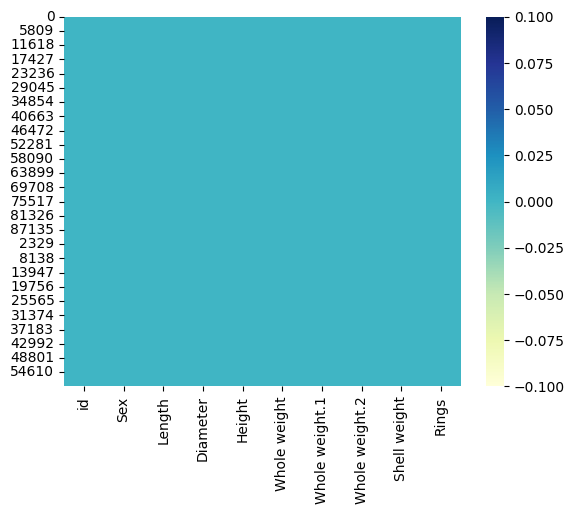

In [17]:
# Creating a heatmap of missing values
sns.heatmap(df.isnull(), cmap="YlGnBu")
plt.show()

Few points on our dataset, so that we might get little intution of what we have done in some above codes:

* The size of our data contains 1,51,026 columns & 10 Rows in our dataset.
* There are no duplicate rows in our dataframe.
* As we have also seen that there are zero null entries in our dataset.



In [18]:
# Dataset Columns
#checking features name of our column
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

#### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
numeric = df.select_dtypes(include=[np.number]).columns
for num_col in numeric:
    print(f"{num_col} : {df[num_col].nunique()} uniqueness variable(s)")

id : 151026 uniqueness variable(s)
Length : 167 uniqueness variable(s)
Diameter : 143 uniqueness variable(s)
Height : 111 uniqueness variable(s)
Whole weight : 3348 uniqueness variable(s)
Whole weight.1 : 1885 uniqueness variable(s)
Whole weight.2 : 1026 uniqueness variable(s)
Shell weight : 1180 uniqueness variable(s)
Rings : 29 uniqueness variable(s)


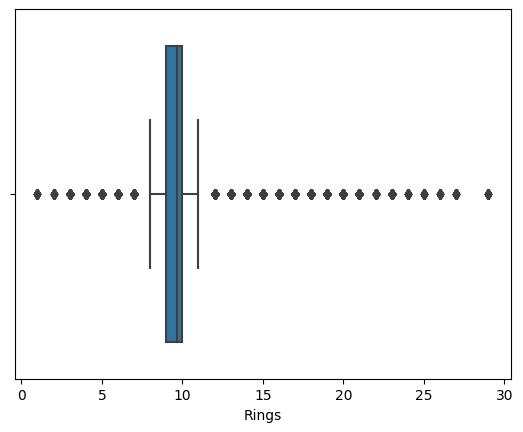

In [20]:
# Outlier detection
sns.boxplot(x=df["Rings"])
plt.show()

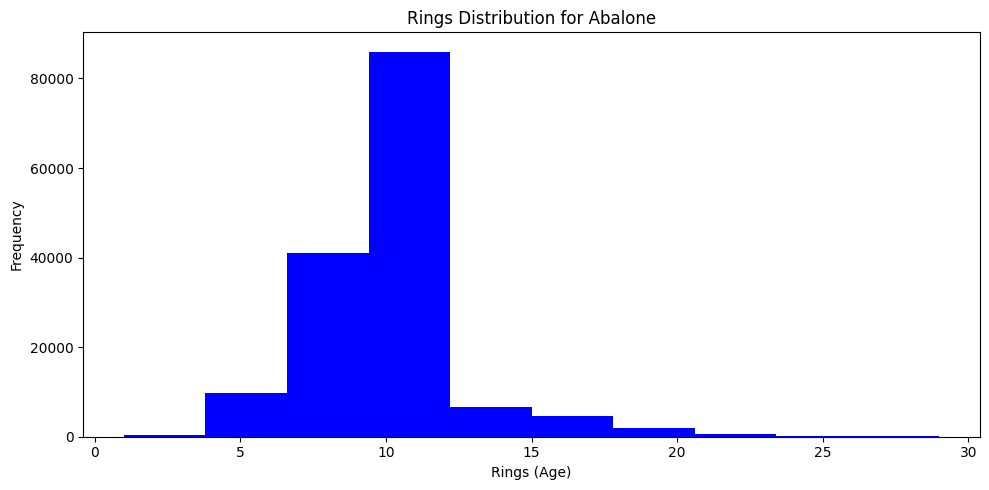

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

df['Rings'].plot(kind='hist', color='blue', ax=ax)
ax.set_xlabel('Rings (Age)')
ax.set_title('Rings Distribution for Abalone')

plt.tight_layout()
plt.show()

Having reviewed the graph, it's evident that the optimal range for abalone Rings falls between 8 to 12. While it's uncommon to come across abalones younger than 5 Rings, encountering individuals with up to 20 Rings is not unusual. This visual representation provides valuable insights into the diverse lifespan distribution of abalones, offering a clearer understanding of their age variability.

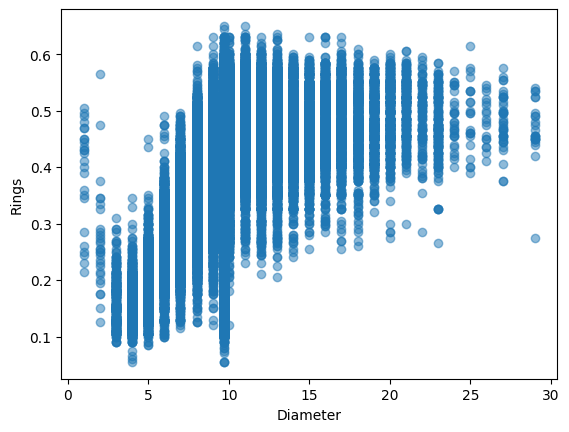

In [22]:
# Chart - 9 visualization code
# data = df['Rings']
plt.scatter(df.Rings, df.Diameter ,  alpha=0.5)
plt.ylabel('Rings')
plt.xlabel('Diameter')
plt.show()

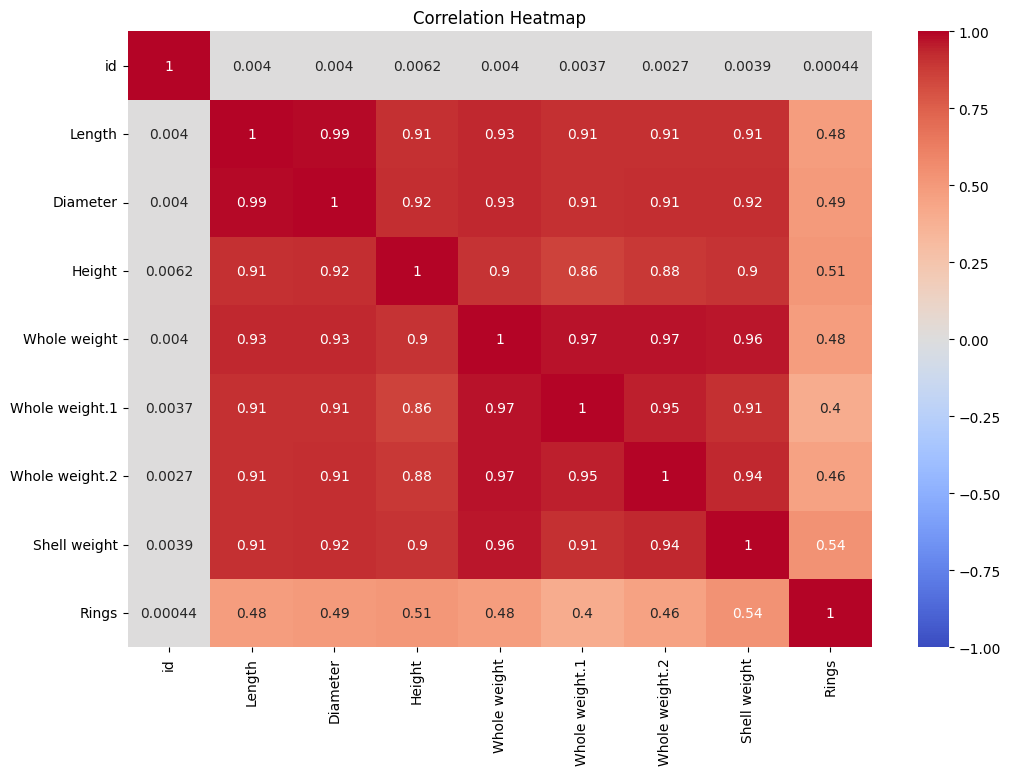

In [23]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation
correlation = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

As we can see the id coloumn has less impact on the pridiction for the age, so we can remove the id coloumn part.

In [24]:
# droping id coloumn
df.drop(columns=['id'], inplace=True)

In [25]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11.0
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11.0
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6.0
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10.0
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9.0


In [26]:
# Assuming df is your DataFrame and 'Rings' is the column you want to exclude from features
features = [col for col in df.describe().columns if col != 'Rings']
features

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight.1',
 'Whole weight.2',
 'Shell weight']

In [27]:
# Transform Your variables
independent_variable = df[features]
dependent_variable = (df['Rings'])

In [28]:
# Scaling your data
X = independent_variable
y = dependent_variable

In [29]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(120820, 7)
(30206, 7)


In [30]:
# check for missing or NaN values
print(df.isna().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


In [31]:
# ML Model - 1 Implementation

reg = LinearRegression()

# Fit the Algorithm
reg.fit(X_train, y_train)

Regression_score = reg.score(X_train, y_train)

# Predict on the model
print(f'Regression score {Regression_score}')

Regression score 0.3585779148246765


In [32]:
# intercept value
reg.intercept_

5.51104268742763

In [33]:
# all the coefficents value
reg.coef_

array([-1.15295553,  5.81915361, 12.7304631 ,  2.19313945, -9.58767891,
       -3.47336215, 12.57252781])

In [34]:
# getting the predicition on test data
y_pred = reg.predict(X_test)
y_pred

array([10.04647494,  7.31280535, 11.63716507, ..., 11.28346961,
       10.01730846,  9.80723688])

In [35]:
# getting the predicition on train data
y_pred_train = reg.predict(X_train)
y_pred_train

array([11.44069675, 10.04806954,  9.30042954, ...,  8.24804333,
       11.95228955,  8.42496411])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [36]:
# Visualizing evaluation Metric Score chart
print('Train Data Evaluation metric Score Chart.' )
MSE  = mean_squared_error((y_train), (y_pred_train))
print("MSE :" , MSE)

MAE  = mean_absolute_error((y_train), (y_pred_train))
print("MAE :" , MAE)

MAPE  = mean_absolute_percentage_error((y_train), (y_pred_train))
print("MAPE :" , MAPE)

r2 = r2_score((y_train), (y_pred_train))
print("R2 :" ,r2)

Train Data Evaluation metric Score Chart.
MSE : 3.868261858150713
MAE : 1.4004658695019496
MAPE : 0.15025176971863638
R2 : 0.3585779148246765
